## Importing the dataset


In [10]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target


In [11]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## Taking care of missing data

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

## Encoding categorical data

### Encoding the Independent Variable


In [13]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable


In [14]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the k Nearest Neighbers model on the Training set

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Predicting the Test set results


In [19]:
y_pred = classifier.predict(X_test)


## Visualising the Training set results

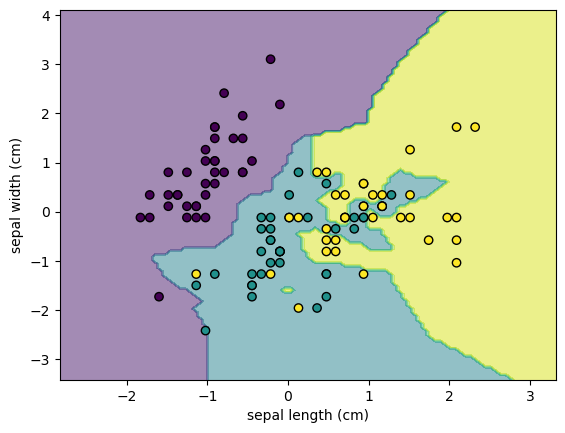

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X_train, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
plt.show()

## Visualising the Test set results

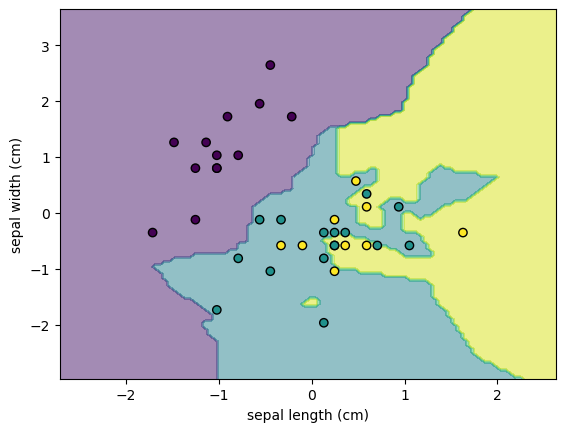

In [21]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X_test, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
plt.show()

## Evaluation

## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 12  4]
 [ 0  5  4]]


0.7631578947368421

## Cheking for overfit of k Nearest Neighbers model 

>1, train: 0.929, test: 0.684
>2, train: 0.857, test: 0.763
>3, train: 0.866, test: 0.737
>4, train: 0.821, test: 0.763
>5, train: 0.848, test: 0.737
>6, train: 0.848, test: 0.737
>7, train: 0.830, test: 0.632
>8, train: 0.830, test: 0.711
>9, train: 0.821, test: 0.737
>10, train: 0.795, test: 0.711
>11, train: 0.821, test: 0.737
>12, train: 0.830, test: 0.763
>13, train: 0.830, test: 0.763
>14, train: 0.830, test: 0.763
>15, train: 0.830, test: 0.737
>16, train: 0.830, test: 0.711
>17, train: 0.830, test: 0.711
>18, train: 0.839, test: 0.737
>19, train: 0.839, test: 0.737
>20, train: 0.839, test: 0.737
>21, train: 0.839, test: 0.737
>22, train: 0.830, test: 0.763
>23, train: 0.839, test: 0.737
>24, train: 0.839, test: 0.763
>25, train: 0.839, test: 0.763
>26, train: 0.830, test: 0.763
>27, train: 0.839, test: 0.737
>28, train: 0.839, test: 0.711
>29, train: 0.839, test: 0.711
>30, train: 0.830, test: 0.711
>31, train: 0.839, test: 0.711
>32, train: 0.830, test: 0.711
>33, train: 0.839

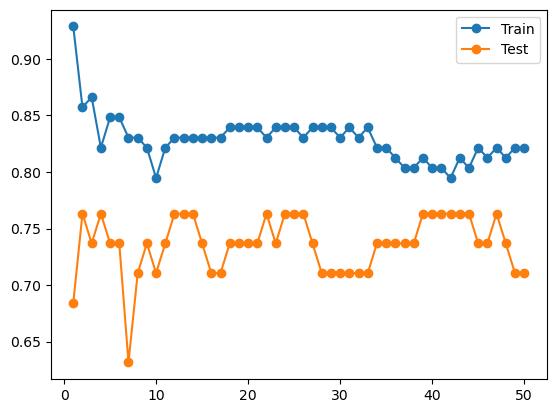

In [23]:

# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
# dataset = pd.read_csv('Social_Network_Ads.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values# split into train test sets
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

## Training the Logistic Regression model on the Training set

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 11  5]
 [ 0  3  6]]


0.7894736842105263

## Training the SVM model on the Training set


In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 11  5]
 [ 0  4  5]]


0.7631578947368421

## Training the Kernel SVM model on the Training set

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 11  5]
 [ 0  4  5]]


0.7631578947368421

## Training the Naive Bayes model on the Training set


In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 12  4]
 [ 0  5  4]]


0.7631578947368421

## Training the Decision Tree Classification model on the Training set


In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 1  8  7]
 [ 0  6  3]]


0.631578947368421

## Training the Random Forest Classification model on the Training set


In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results


In [44]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0  8  8]
 [ 0  4  5]]


0.6842105263157895